<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/Information_gain(Zysk_Informacji).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def entropy(x):
    return -np.sum(x * np.log2(x))

In [4]:
print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))

1.0
0.7219280948873623
0.28639695711595625


In [5]:
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p,q]

In [12]:
pq[:5]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95]])

In [14]:
entropies = [entropy(pair) for pair in pq]#obliczam dla kazdej pary entropie
entropies

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812,
 0.499915958164528,
 0.5293608652873644,
 0.557438185027989,
 0.584238811642856,
 0.6098403047164005,
 0.6343095546405662,
 0.6577047787442195,
 0.6800770457282799,
 0.7014714598838974,
 0.7219280948873623,
 0.7414827399312737,
 0.7601675029619657,
 0.7780113035465377,
 0.7950402793845222,
 0.8112781244591328,
 0.8267463724926178,
 0.8414646362081757,
 0.8554508105601306,
 0.8687212463394046,
 0.8812908992306927,
 0.8931734583778568,
 0.9043814577244939,
 0.9149263727797275,
 0.9248187049730301,
 0.934068055375491,
 0.9426831892554923,
 0.9506720926870659,
 0.9580420222262995,
 0.9647995485050872,
 0.9709505944546686,
 0.976500468757824,
 0.9814538950336537,
 0.9858150371789197,
 0.9895875212220556,
 0.9927744539878083,
 0.9953784388202257,
 0.9974015885677396,
 0.998845535

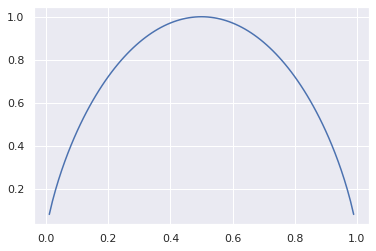

In [15]:
plt.plot(p, entropies)

### Rozważmy dane

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
###  $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział
$m$ - liczba podziałów

In [16]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

### Rozkład zmiennej `Wiarygodność`

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       | 0
| średnia | 2/10   | 1/2                     | 1/2                     | 1
| wysoka  | 3/10   | 0                       | 1                       | 0

Entropia po podziale

In [17]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

### Rozkład zmiennej  `Dochód`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |0
| sredni | 4/10   | 2/4                     | 2/4                     |1
| wysoki | 3/10   | 1/3                     | 2/3                     | 0.9183

Entropia po podziale

In [18]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

### Zysk Informacyjny

$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [19]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
